In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('toxic_comment_dataset.xlsx')

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

In [5]:
# Checking the length of comments to see the variation
comment_length = df.comment_text.str.len()

In [6]:
# the min and max lengths
comment_length.max(), comment_length.min()

(5895.0, 6.0)

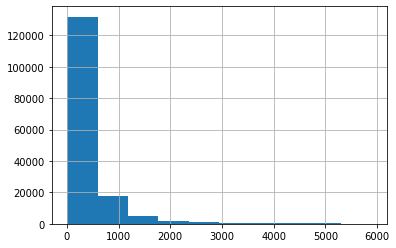

In [7]:
# lets visualize the distribution
comment_length.hist()

In [8]:
# There is a big difference between the shortest and the longest comment, 
# which in the future may need some trimming
# And the majority of comments are upto 500 words with some exceptions exceeding 5000

In [9]:
# lets check the null values in the dataset
df.comment_text.isnull().sum()

122

In [10]:
# dropping null comment_text rows as the count of null rows 
# does not drastically change the size of dataset
df.dropna(axis=0, inplace=True)
df.shape

(159449, 8)

In [11]:
# check for any other null values
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [12]:
# checking the basic stats for numeric columns, to confirm any anomalies
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159449.000000,159449.000000,159449.000000,159449.000000,159449.000000,159449.000000
mean,0.095755,0.009991,0.052882,0.002979,0.049326,0.008805
std,0.294256,0.099453,0.223799,0.054499,0.216549,0.093423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# check for % comments with no labels
col_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 
             'insult', 'identity_hate']
sum_columns = df[col_names].sum(axis=1)
sum_zero_columns  = [x for x in sum_columns if x==0]
print('% of Unlabelled comments =  ', (len(sum_zero_columns)/df.shape[0])*100)

% of Unlabelled comments =   89.84063869952148


In [14]:
# Almost 90% of comments in the dataset are unlabelled

In [15]:
# Now we clean the data to move into the model implementation phase
# Reusing a function previously I used in my academic projects
import re
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
# stopwords.extend(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 
#                       've', 'u', 'ur', 'don', 't', 's', 'amp', 'kat', 'de'])
def clean_text(comment_text):
    clean_text = re.sub(TEXT_CLEANING_RE, ' ', comment_text)
    clean_text = clean_text.lower()
    clean_text = ' '.join([word for word in nltk.word_tokenize(clean_text) 
                           if word not in stopwords])
    return clean_text

In [16]:
df['comment_text'] = df['comment_text'].astype(str)
df['comment_text'] = df['comment_text'].apply(clean_text)

In [17]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0
5,00025465d4725e87,congratulations well use tools well talk,0,0,0,0,0,0
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0
7,00031b1e95af7921,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0
8,00037261f536c51d,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0
9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0


In [18]:
# Vectorizing tweets to convert the text into ML model readable format
# Using TFIDF Vectorizer 
# (through my previous work, this vectorization works better over CountVectorization)
from sklearn.feature_extraction.text import TfidfVectorizer
# max_features 5895 because of the max length string explored earlier
tfidf = TfidfVectorizer(max_features=5895, stop_words='english')
tfidf

TfidfVectorizer(max_features=5895, stop_words='english')

In [19]:
# Split the data into train and test and then apply vector model
X = df['comment_text']
y = df.iloc[:, 2:8]

In [20]:
from sklearn.model_selection import train_test_split
# 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [21]:
# fit and transform on it the training features
tfidf.fit(X_train)
X_train_word_features = tfidf.transform(X_train)

#transform the test features to sparse matrix
test_features = tfidf.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
# Building and applying a random forest classifier

auc = []

for label in col_names:
    # run the model on each label column
    train_target = y_train[label]
    test_target = y_test[label]
    classifier = RandomForestClassifier()

    print('For class {}\n'.format(label))
    classifier.fit(X_train_word_features, train_target)
    y_pred = classifier.predict(test_features)
    y_pred_prob = classifier.predict_proba(test_features)[:, 1]
    auc_score = roc_auc_score(test_target, y_pred_prob)
    auc.append(auc_score)
    print("ROC_AUC score {}\n".format(auc_score))
    
    print(confusion_matrix(test_target, y_pred))
    print(classification_report(test_target, y_pred))
  
print('Total average ROC_AUC score is {}'.format(np.mean(auc)))

For class toxic

ROC_AUC score 0.9516816693890209

[[42533   686]
 [ 1490  3126]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     43219
           1       0.82      0.68      0.74      4616

    accuracy                           0.95     47835
   macro avg       0.89      0.83      0.86     47835
weighted avg       0.95      0.95      0.95     47835

For class severe_toxic

ROC_AUC score 0.9698009235915757

[[47323    40]
 [  445    27]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     47363
           1       0.40      0.06      0.10       472

    accuracy                           0.99     47835
   macro avg       0.70      0.53      0.55     47835
weighted avg       0.98      0.99      0.99     47835

For class obscene

ROC_AUC score 0.9770531139260095

[[44924   357]
 [  647  1907]]
              precision    recall  f1-score   support

           0       0.99      0.99   